## PyTorch Tutorial!!!
In this assignment, you will be familiarized with the usage of the PyTorch library and how to build a model in two ways  
It's quite similar to TensorFlow
*   using the inbuilt layers in pytorch
*   using custom layers to replicate the same result

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [32]:
# Using the GPU if it exists
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### Loading and preprocessing the Data
We will directly be using the dataset included in literally any library that exists. MNIST really is THAT popular.  
Link: https://docs.pytorch.org/vision/0.9/datasets.html#mnist

In [33]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)

## Making a simple feedforward network

The following is a simple feedforward model with three layers:
* a flatten layer to convert our 28x28 images into a single array of length 784
* a dense layer of 128 neurons with the relu activation function
* finally a dense layer of 10 neurons with the softmax activation to get a distribution between the digits

In [34]:
# Build the model
SequentialNet = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)

### Training and Testing loops

In [35]:
# Training loop
def train(model, loader, optimizer, loss_fn, epochs=5):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            logits = model(x)
            loss = loss_fn(logits, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Testing loop
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            logits = model(x)
            pred = logits.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    print(f"Accuracy: {100 * correct / total:.2f}%")


### Training the sequential model

In [36]:
print("\nTraining SequentialNet")
sequential_model = SequentialNet.to(device)
optimizer_seq = optim.Adam(sequential_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


train(sequential_model, train_loader, optimizer_seq, loss_fn)
test(sequential_model, test_loader)


Training SequentialNet
Epoch 1, Loss: 377.0540
Epoch 2, Loss: 181.1596
Epoch 3, Loss: 127.5819
Epoch 4, Loss: 104.1927
Epoch 5, Loss: 88.6052
Accuracy: 96.55%


### Manually building the same network from scratch
You can use the simple sequential model we described above as a reference.

In [37]:
# Custom model
class ManualNet(nn.Module):
    def __init__(self):
        super(ManualNet, self).__init__()
        # TODO: Define your paramters using nn.Parameters (the layers)
        self.w1 = nn.Parameter(torch.randn(784, 128) * 0.01)
        self.b1 = nn.Parameter(torch.zeros(128))
        self.w2 = nn.Parameter(torch.randn(128, 64) * 0.01)
        self.b2 = nn.Parameter(torch.zeros(64))
        self.w3 = nn.Parameter(torch.randn(64, 10) * 0.01)
        self.b3 = nn.Parameter(torch.zeros(10))

    def forward(self, x):
        x = x.view(-1, 784)
        # TODO: Do the forward pass using matrix multiplications and applying activation functions
        x = torch.matmul(x, self.w1) + self.b1
        x = torch.relu(x)
        x = torch.matmul(x, self.w2) + self.b2
        x = torch.relu(x)
        x = torch.matmul(x, self.w3) + self.b3
        return x

### Training the manual model

In [38]:
print("\nTraining ManualNet")
# TODO: Create a ManualNet object and call it manual_model. Train and test it
manual_model = ManualNet().to(device)
optimizer_manual = optim.Adam(manual_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

train(manual_model, train_loader, optimizer_manual, loss_fn)
test(manual_model, test_loader)


Training ManualNet
Epoch 1, Loss: 526.7999
Epoch 2, Loss: 232.0824
Epoch 3, Loss: 159.6741
Epoch 4, Loss: 125.1238
Epoch 5, Loss: 103.1067
Accuracy: 96.44%


### Visualize the outputs of the models

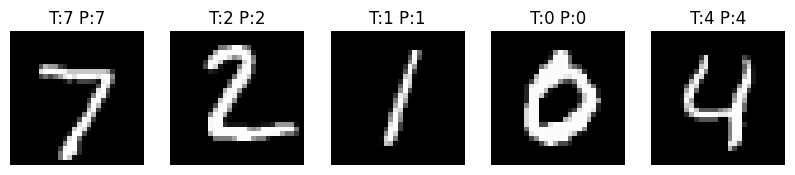

In [39]:
def visualize(model, loader, n=5):
    model.eval()
    x, y = next(iter(loader))
    x, y = x.to(device), y.to(device)
    preds = model(x).argmax(dim=1)

    plt.figure(figsize=(10, 2))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(x[i].cpu().squeeze(), cmap='gray')
        plt.title(f"T:{y[i].item()} P:{preds[i].item()}")
        plt.axis('off')
    plt.show()

# visualize(manual_model, test_loader) # Uncomment this later
visualize(sequential_model, test_loader)

## Assignment
* Load and preprocess CIFAR100 dataset (not CIFAR10)
* Build a feedforward network for it. You can experiment around with number of layers and and neurons in each layer and different activation functions
* You are allowed to use nn.functional. (convolutions _might_ make your accuracy better)

# Bonus Assignment
* Try the solving the "Titanic Survival Prediction" dataset from kaggle